# Using K-Means for Classification (debugging)
https://www.kaggle.com/minc33/using-k-means-for-classification-debugging
## **In this notebook we will compare using an unsupervised learning algorithm (K-Means Clustering) and a simple supervised learning algorithm (Logistic Regression) for binary classification on the mushroom data set. To compare our algorithms, we will use scikit-learn's test_train_split() method.**

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Read the original data.

In [3]:
orig = pd.read_csv('../data/mushrooms.csv')

# (Don't uncomment this next statement until instructed to below.)

In [ ]:
#Shuffles the orig DataFrame
#orig = orig.sample(frac=1)

In [4]:
orig.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Now we will build our training data set so that the machine can work on it.

We will use the 'class' attribute as our dependent variable (variable to be predicted) and all the other attributes as our independent variables (variables to be used for prediction).

In [5]:
X = orig.drop(['class'], axis=1)
y = orig['class']

Before we encode each of our categorical variables in X & y with numbers so that algorithm can work with them, we will first take a look at the values contained within each of X's attributes..

# Exploration

In [6]:
for attr in X.columns:
    print('\n*', attr, '*')
    print(X[attr].value_counts())


* cap-shape *
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

* cap-surface *
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

* cap-color *
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

* bruises *
f    4748
t    3376
Name: bruises, dtype: int64

* odor *
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

* gill-attachment *
f    7914
a     210
Name: gill-attachment, dtype: int64

* gill-spacing *
c    6812
w    1312
Name: gill-spacing, dtype: int64

* gill-size *
b    5612
n    2512
Name: gill-size, dtype: int64

* gill-color *
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

* stalk-shape *
t    4608
e    3516
Name: stalk-shape, dtype: int64

* stalk-root *
b    3776


Two things to note here: 

First, the 'veil-type' variable has only one value, 'p'. And since there is only one possible value, it gives us little information - so we can drop this column.

In [7]:
X.drop(['veil-type'], axis=1, inplace=True)

Second, the 'stalk-root' variable has a '?' value for it's missing values. Rather than impute this missing value, I will divide the dataset into two sections: where 'stalk-root'=='?' and where 'stalk-root'!='?', and analyze the distribution of each variable within those two data sets. 

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

Text(0.5, 1.0, 'stalk-root = ?')

Text(0.5, 1.0, 'stalk-root != ?')

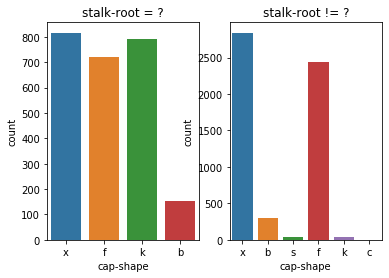

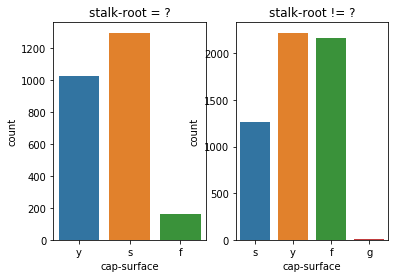

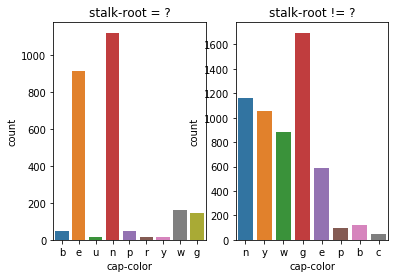

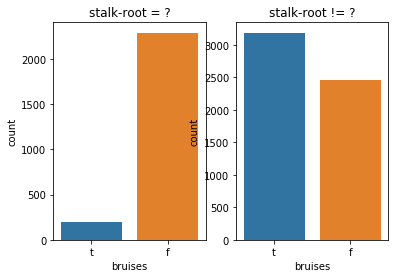

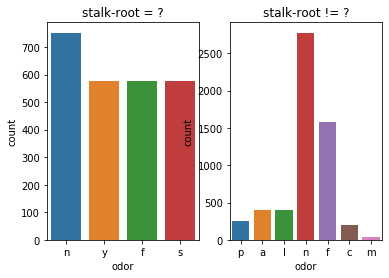

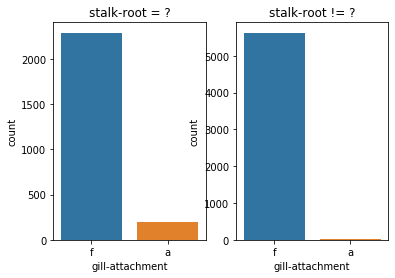

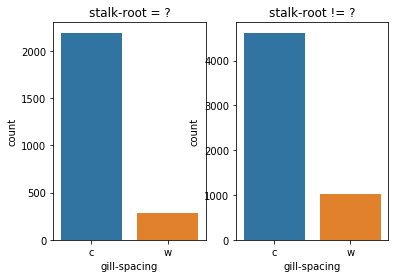

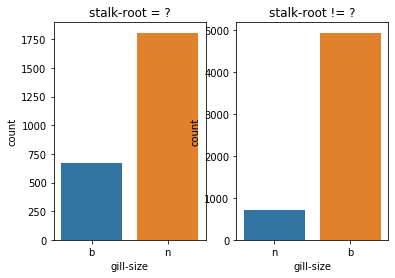

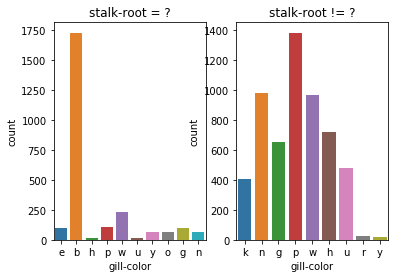

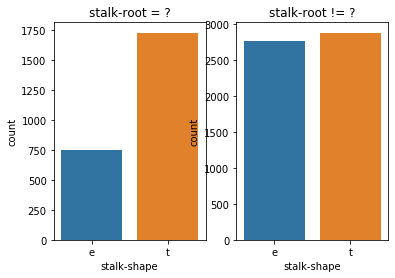

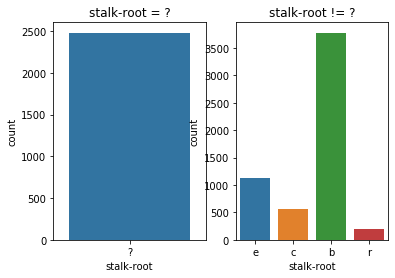

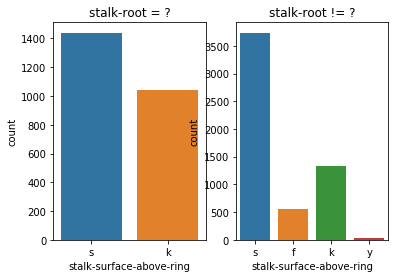

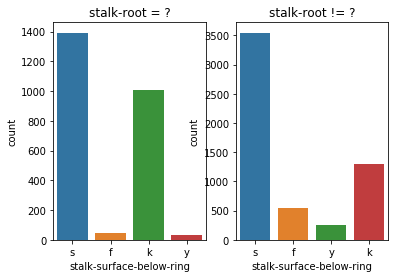

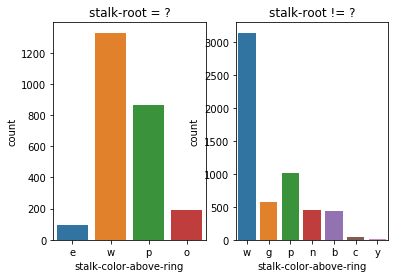

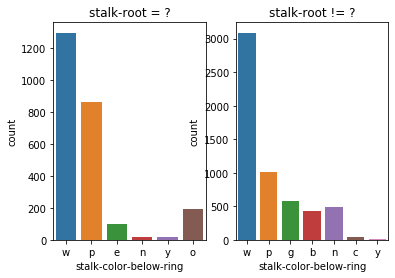

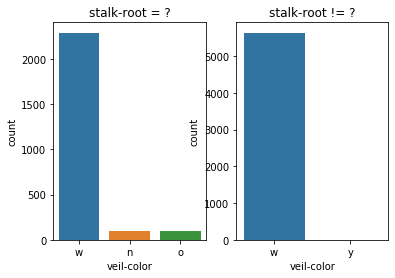

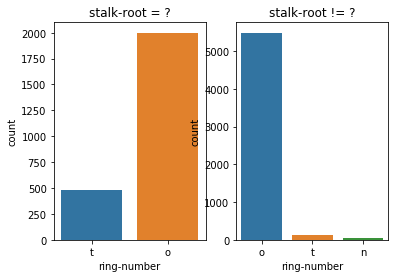

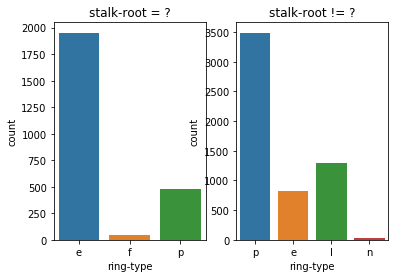

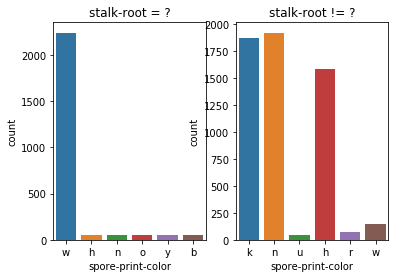

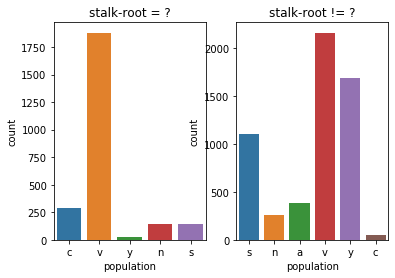

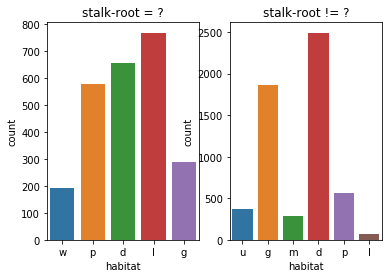

In [8]:
for attr in X.columns:
    fig, ax =plt.subplots(1,2)
    sns.countplot(X[X['stalk-root']=='?'][attr], ax=ax[0]).set_title('stalk-root = ?')
    sns.countplot(X[X['stalk-root']!='?'][attr], ax=ax[1]).set_title('stalk-root != ?')
    fig.show()

Since the distributions are very different among the variables (meaning that the '?' values may not be irrelevant), we will not impute the '?' values for 'stalk-root', rather, we will encode them for our learning algorithms.

# Encoding:

We'll use a binary encoding for variables that hold only 2 possible values, and a one-hot-encoding for variables that hold 3 or more possible values.

In [9]:
#For columns with only two values
for col in X.columns:
    if len(X[col].value_counts()) == 2:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [10]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,1,p,1,0,1,k,0,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,1,a,1,0,0,k,0,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,1,l,1,0,0,n,0,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,1,p,1,0,1,n,0,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,0,n,1,1,0,k,1,...,s,s,w,w,w,o,e,n,a,g


And now we 'one-hot-encode' the rest of the variables:

In [11]:
X = pd.get_dummies(X)

In [12]:
X.head()

,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Clustering: Problem begins here. I'd recommend not commenting anything out until you reach the end of the clustering section so that you can see the inital clustering result. Then after, read the block below for instructions to see how the bug arises. 

We will cluster the data into two clusters, one will hold most of the 'poison' mushrooms and the other one will hold most of the 'edible' mushrooms.

Keep in mind that the dataset, 'X' does not specify which mushrooms are 'edible' or 'poisonous', and so the clustering algorithm is ignorant of this too!

In [ ]:
#New
#train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.0)

In [ ]:
#New (used to show train_X is indeed the same as X, albeit, shuffled)
#print(len(X))
#print(len(train_X), len(train_y))
#print(len(val_X), len(val_y))

In [13]:
kmeans = KMeans(n_clusters=2, random_state=None)

#Old
kmeans.fit(X)

#New
#kmeans.fit(train_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
#Old
clusters = kmeans.predict(X)

#New
#clusters = kmeans.predict(train_X)

In [15]:
clusters

array([0, 0, 0, ..., 0, 1, 0])

We create a DataFrame to show how each cluster holds different shares of the poisonous mushrooms.

In [16]:
cluster_df = pd.DataFrame()
cluster_df['cluster'] = clusters

#Old
cluster_df['class'] = y

#New
#cluster_df['class'] = train_y

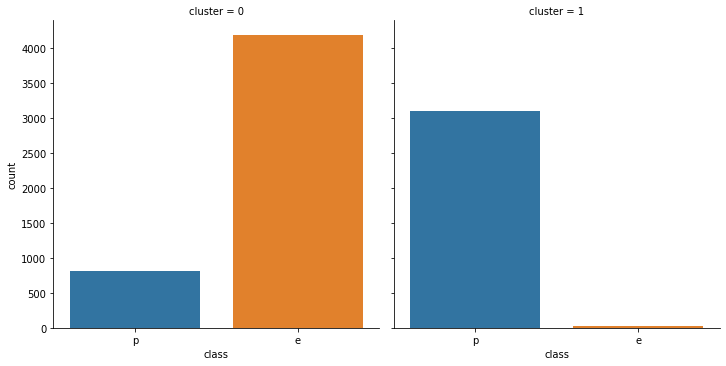

In [17]:
sns.factorplot(col='cluster', y=None, x='class', data=cluster_df, kind='count')

## End of clustering

### As we can see from above, one cluster has clustered most of the' edible' mushrooms, while the other cluster has clustered most of the 'poisonous' mushrooms. Beautiful. 
## Now, to see the bug, run again starting at the Clustering header, but un-comment the '#New' statements and comment-in the '#Old' statements in the code-blocks to see the bug. And after that read the block below this one.

## And now both clusters hold a majority of edible mushrooms.... Weird, eh?

## Next, I'd recommend recommenting-out the '#New' statements, uncommenting the old statements, then re-running this kernel, but with the 'orig' data frame shuffled. I left a piece of commented code at the top of the kernel that does this, that you should comment out. 
## So, to recap, you should re-run the kernel, but with the shuffle statement uncommented, the '#Old' statements uncommented, the '#New' statements commented-in, and observe the resulting factor plot for the clusters. After that, read the block below: 

# And once again, both clusters have a majority of edible mushrooms...
# The problem seems to have to do with shuffling the DataFrame, but even that seems strange given how nice the original clustering result was (with most of the edibles in one cluster, and most of the poison edibles in the other).
# Let me know what you think!

Disregard the below statements.

From the above observation, we see that our clustering algorithm could potentially be used to classify mushrooms as either 'poisonous' or 'edible'.

For example, if we used our clustering model to place a mushroom in cluster 0, we could predict it to be edible, and if it placed the mushroom into cluster 1, we could predict it to be 'poisonous'. 

This is what we'll do in the next section, and, just for fun, we will compare it's performance to sklearn's LogisticRegression.

# Classification

Will get started here after clustering problem is figured out.